In [61]:
from pydataset import data
df=data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [62]:
#Removing rhe last colums because it not important for us


df1=df.drop(columns=['Species'])
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [63]:
from sklearn.cluster import KMeans 
#Create the Kmeans object


km=KMeans(n_clusters=3, init='k-means++',random_state=1234)

In [64]:
# Fitting the model on my data


km.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [65]:
#Identifying the centroids cordinate


km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [66]:
#Creating the column in our data set


df1['Clustor']=km.predict(df1.values)
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Clustor
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [67]:
df1.groupby('Clustor').size()

Clustor
0    50
1    62
2    38
dtype: int64

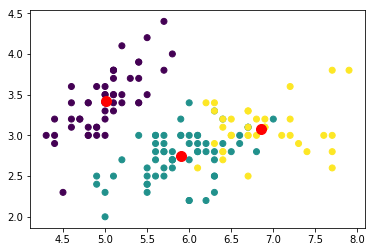

In [68]:
#lets plot the scatter plot for sepal lengh and sepal width

from matplotlib import pyplot as plt

plt.scatter(df1['Sepal.Length'],df1['Sepal.Width']   , c=df1['Clustor'])
plt.scatter(km.cluster_centers_[: ,0],km.cluster_centers_[:,1],c='red',s=100)
plt.show()

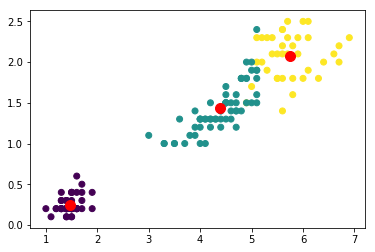

In [69]:
plt.scatter(df1['Petal.Length'],df1['Petal.Width'], c=df1['Clustor'])
plt.scatter(km.cluster_centers_[: ,2],km.cluster_centers_[:,3],c='red',s=100)
plt.show()

In [32]:
import os
import pandas as pd

path= r"C:\Users\Lenovo\Desktop\Cars"
os.chdir(path)
os.listdir(path)
election=pd.read_excel("Election data base.xlsx")

In [37]:
election1=election[['st_name','totvotpoll','electors']]
election1.head()

,st_name,totvotpoll,electors
0,Andhra Pradesh,813.0,83247
1,Andhra Pradesh,1743.0,83247
2,Andhra Pradesh,4427.0,83247
3,Andhra Pradesh,19805.0,83247
4,Andhra Pradesh,34251.0,83247


In [80]:
election2=election1.groupby('st_name')[['totvotpoll','electors']].mean().reset_index()
election2.head()

,st_name,totvotpoll,electors
0,Andhra Pradesh,12888.341450,214573.167908
1,Arunachal Pradesh,2435.059347,13016.475204
2,Assam,8408.626607,102227.586949
3,Bihar,6436.221233,174116.294425
4,Chhattisgarh,11302.725093,175266.152989


In [81]:
election3=election2.drop(columns=['st_name'])

In [82]:
from sklearn.cluster import KMeans 
#Create the Kmeans object


km1=KMeans(n_clusters=3, init='k-means++',random_state=1234)

In [83]:
km1.fit(election3.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [84]:
km1.cluster_centers_

array([[  4023.36286569,  28297.78994336],
       [ 10288.6312337 , 195898.29285355],
       [  9785.1653967 , 127631.26518   ]])

In [85]:
election3['Clustor']=km1.predict(election3.values)
election3.head()

,totvotpoll,electors,Clustor
0,12888.341450,214573.167908,1
1,2435.059347,13016.475204,0
2,8408.626607,102227.586949,2
3,6436.221233,174116.294425,1
4,11302.725093,175266.152989,1


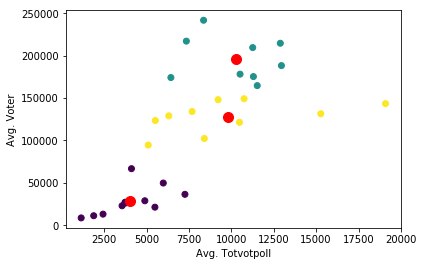

In [88]:
from matplotlib import pyplot as plt

plt.scatter(election3['totvotpoll'],election3['electors']   , c=election3['Clustor'])
plt.xlabel('Avg. Totvotpoll')
plt.ylabel('Avg. Voter')


plt.scatter(km1.cluster_centers_[: ,0],km1.cluster_centers_[:,1],c='red',s=100)
plt.show()

In [93]:
clustor_error=[]

for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1234)
    kmeans.fit(election3.values)
    clustor_error.append(kmeans.inertia_)

In [94]:
clustor_error

[154678321605.8349,
 33111374688.269497,
 11568860682.75126,
 7124162138.047387,
 4034277489.6895013,
 2792550851.5730667,
 2084794576.4755216,
 1493193009.7078278,
 954129080.995912,
 762664863.1929747,
 659783404.1832556,
 492051792.9626107,
 402587586.97937703,
 304723230.8078122]

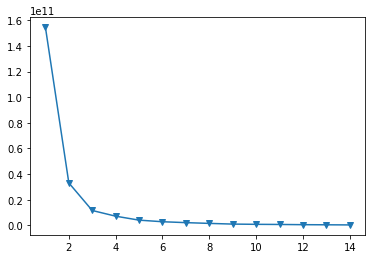

In [95]:
plt.plot(range(1,15),clustor_error,marker='v')